Perkenalan
1. Nama: Muhammad Zukri Al Walidani
2. Batch: 007

Data berikut merupakan data dari kampanye salah satu fitur investasi Bank X kepada konsumen yaitu berupa deposito. Deposito merupakan instumen investasi untuk simpanan yang diterbitkan dengan jangka waktu 1, 3, 6 dan 12 bulan atau waktu tertentu. Uang konsumen akan diputarkan kepada usaha yang dikelola bank dan konsumen akan mendapatkan persentase. Untuk mendapatkan modal usaha tersebut Bank X membutuhkan data investasi sebanyka banyaknya untuk menjadlankan bisnis tersebut. Bank X sudah melakukan kampanye atau promosi kepada calon konsumennya, namun promosi tersebut dirasa belum efektif dan efisien, olehkakrena itu Bank X membutuhkan analisis faktor yang mempengaruhi konsumen untuk ikut berinvestasi dalam instrumen deposito yang mereka tawarkan dan rencana strategis lain kedepanya.

Import Pustaka

In [21]:
import pandas as pd
import numpy as np
import time
import gc
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import category_encoders as ce

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from tqdm import tqdm

Input Data

In [22]:
df=pd.read_csv('bank-additional-full.csv',sep=';')

Eksplorasi data sederhana

In [23]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [24]:
df.describe()
#data terdistribusi normal

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [25]:
df.info()
#tidak ada missing value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Exploratory Data Analysis (EDA) fitur kategori

In [26]:
def plot_bar(column):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['No_deposit'] = df[df['y'] == 'no'][column].value_counts()
    temp_1['Yes_deposit'] = df[df['y'] == 'yes'][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show();

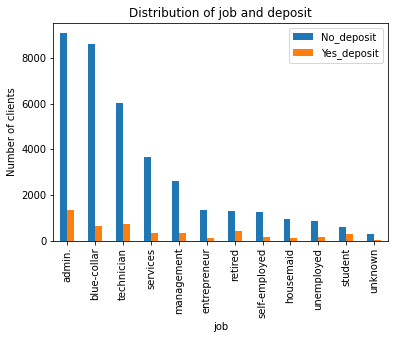

In [27]:
plot_bar('job')

Staff administrasi dan karyawan paling banyak ditawarkankan, sementara untuk perbandingan antara penolakan dan penerimaan tawaran staff administrasi, teknisi, pensiunan dan pelajar patut dipertimbangkan.

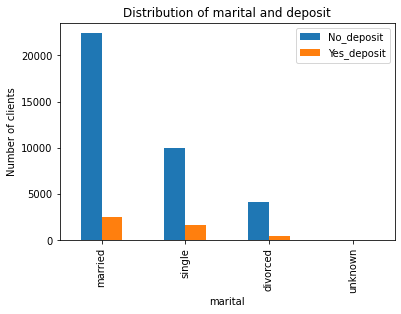

In [28]:
plot_bar('marital')

penawaran paling banyak diberikan kepada konsumen yang telah menikah namun melihat perbandinganya yang belum menikah merespon lebih baik

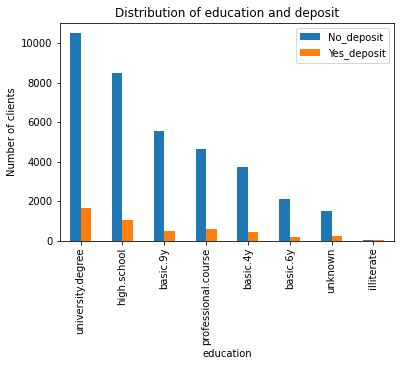

In [29]:
plot_bar('education')

konsumen dengan lulusan universitas dan sekolah menengah atas mendominasi distribusi

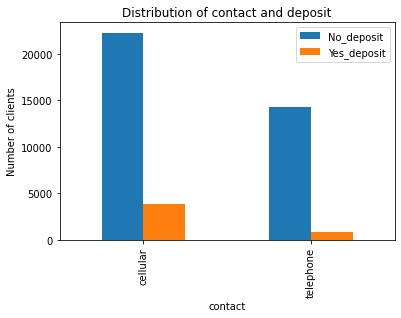

In [30]:
plot_bar('contact')

Konsumen dengan handphone lebih berpeluang dari pada konsumen yang memakai telepon

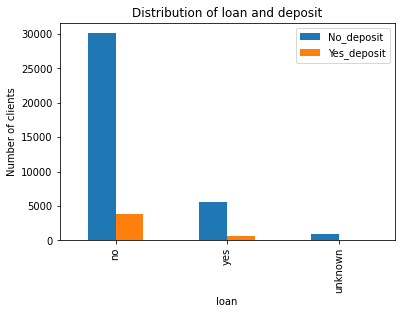

In [31]:
plot_bar('loan')

Penawaran paling banyak diberikan kepada konsumen yang pernah menerima pelayanan bank seperti pinjaman

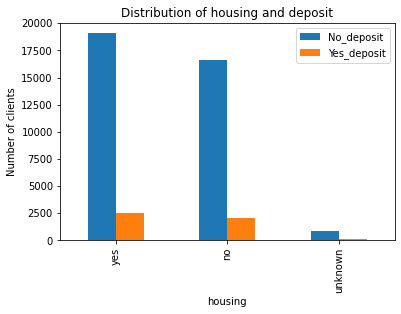

In [32]:
plot_bar('housing')

Konsumen yang memiliki rumah lebih ditarget oleh marketing

Exploratory Data Analysis (EDA) Fitur Numerik

In [33]:
import plotly.express as px

fig = px.box(df, x="job", y="duration", color="y")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

konsumen yang menolak kebanyakan memiliki durasi yang lebih rendah dibandingkan dengan yang ikut deposit

In [34]:
fig = px.scatter(df, x="campaign", y="duration", color="y")
fig.show()

semakin lama durasi semakin besar kemungkinan untuk konsumen ikut deposit

<BarContainer object of 41188 artists>

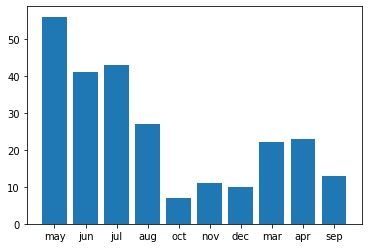

In [35]:
plt.bar(df['month'], df['campaign'])

kampanye atau promosi paling masif dilakukan pada bulan Mei, Juni dan Juli

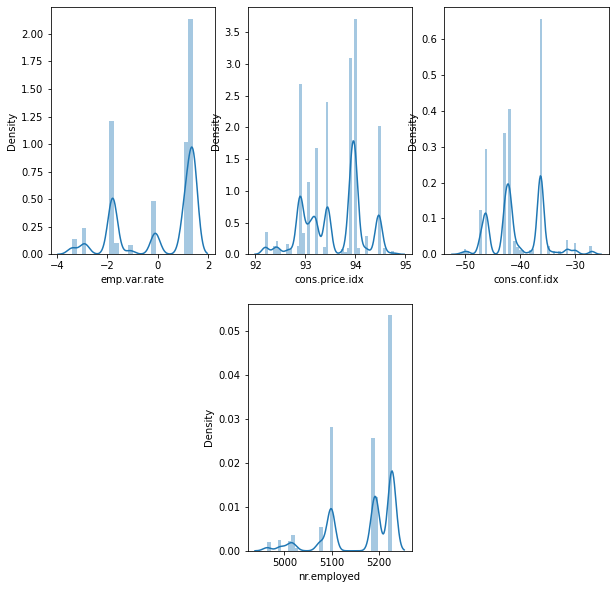

In [36]:
plt.subplot(231)
sns.distplot(df['emp.var.rate'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(df['cons.price.idx'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(df['cons.conf.idx'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(df['nr.employed'])
fig = plt.gcf()
fig.set_size_inches(10,10)

1. Promosi kepada berbagai variasi tenaga kerja menunjukkan hubungan yang berbanding lurus.
2. indeks harga konsumen juga memberikan pengaruh yang berbanding lurus dengan angka deposit
3. indeks kepercyaan konsumen cenderung tidak terlalu mencolok, dikarenakan kurangnya kepercayaan konsumen kepada ekonomi
4. Jumlah tenaga kerja yang di promosikan berhubungan positif dengan angka deposit.

<AxesSubplot:xlabel='cons.price.idx', ylabel='marital'>

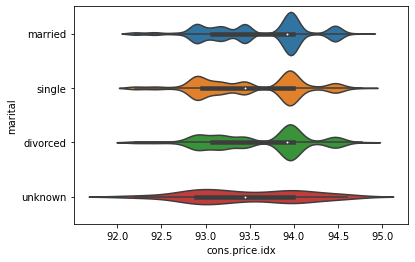

In [37]:
sns.violinplot( y=df["marital"], x=df["cons.price.idx"] )

tidak terlalu terlihat perbedaan status pernikahan dengan price indeks

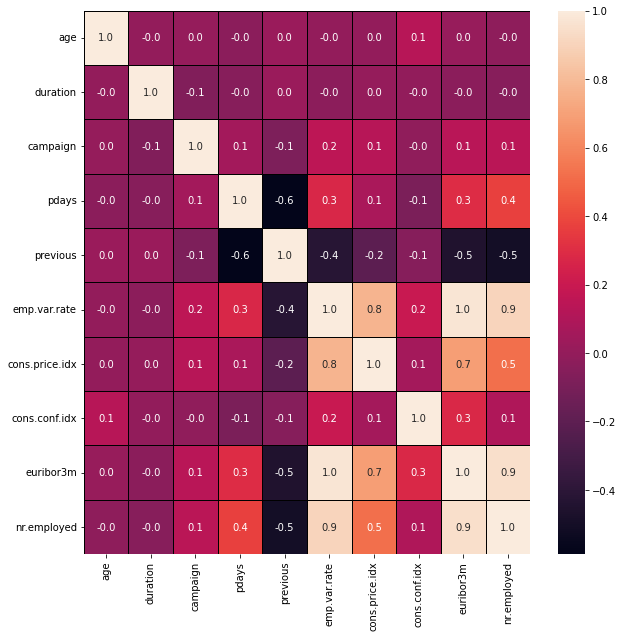

In [38]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

1. Masing masing variabel berkorelasi dengan dirinya sendiri
2. Variasi tenaga kerja sangat berkorelasi dengan jumlah tenaga kerja
3. Indeks harga konsumen berkorelasi dengan variasi tenaga kerja


Feature Engineering

Handling Outliers

Text(0.5, 1.0, 'No of employees')

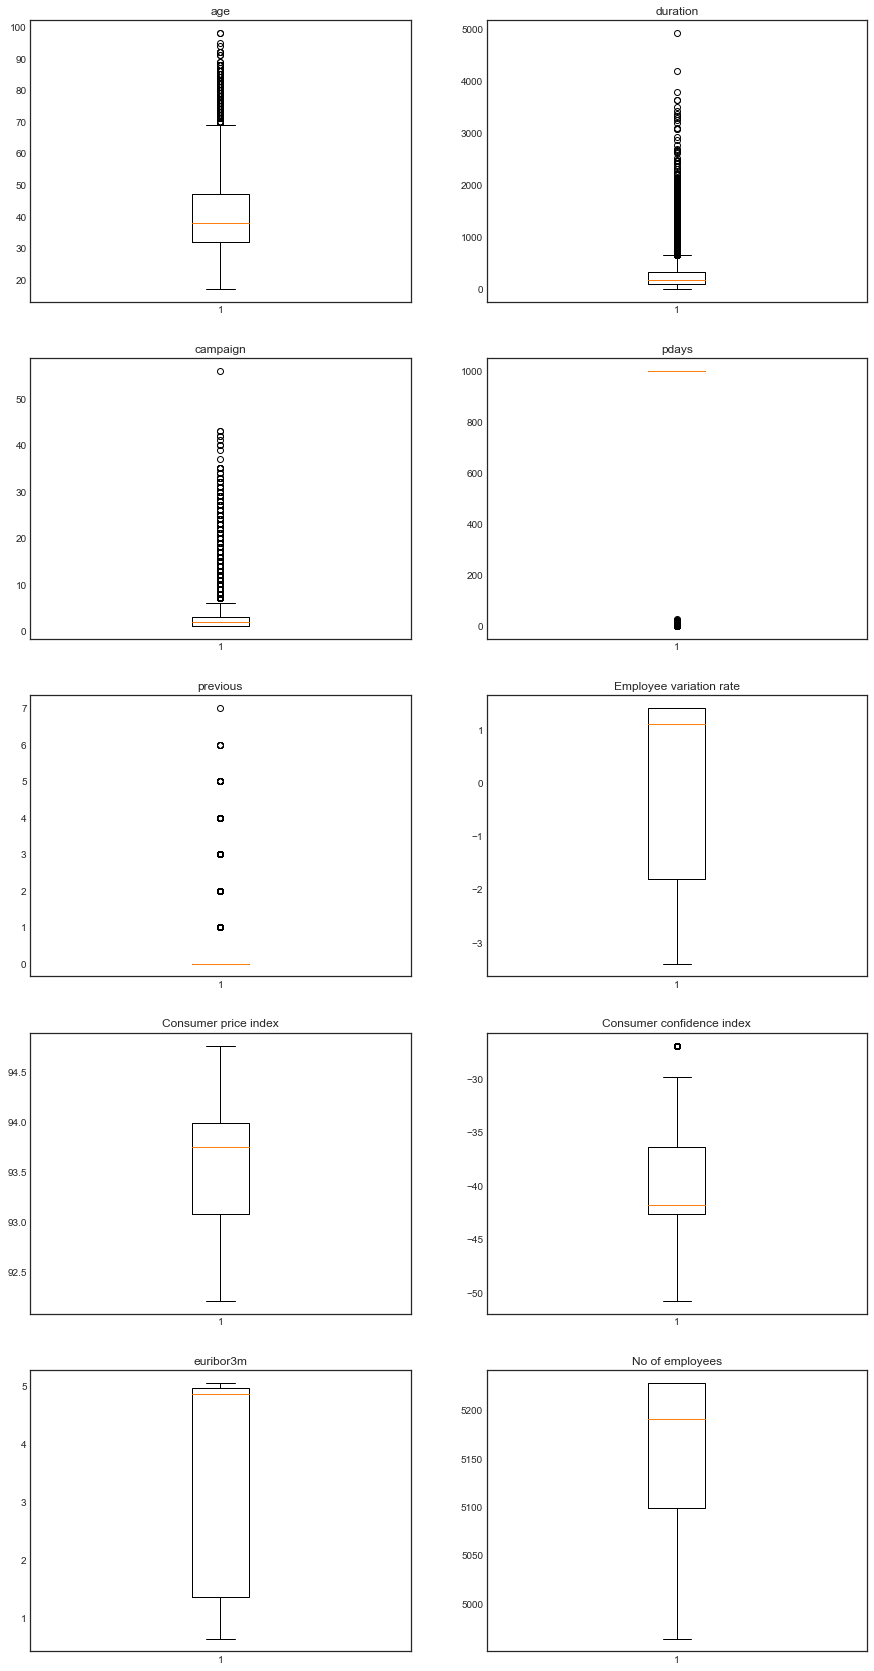

In [39]:
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(df['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(df['duration'])
ax.set_title('duration')
ax=plt.subplot(523)
plt.boxplot(df['campaign'])
ax.set_title('campaign')
ax=plt.subplot(524)
plt.boxplot(df['pdays'])
ax.set_title('pdays')
ax=plt.subplot(525)
plt.boxplot(df['previous'])
ax.set_title('previous')
ax=plt.subplot(526)
plt.boxplot(df['emp.var.rate'])
ax.set_title('Employee variation rate')
ax=plt.subplot(527)
plt.boxplot(df['cons.price.idx'])
ax.set_title('Consumer price index')
ax=plt.subplot(528)
plt.boxplot(df['cons.conf.idx'])
ax.set_title('Consumer confidence index')
ax=plt.subplot(529)
plt.boxplot(df['euribor3m'])
ax.set_title('euribor3m')
ax=plt.subplot(5,2,10)
plt.boxplot(df['nr.employed'])
ax.set_title('No of employees')

Terlihat terdapat Outlier pada umur, kampanye dan durasi, selanjutnya menghilangkan outliers

In [40]:
numerical_features=['age','campaign','duration']
for cols in numerical_features:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (df[cols] >= Q1 - 1.5 * IQR) & (df[cols] <= Q3 + 1.5 *IQR)
    df=df.loc[filter]

Text(0.5, 1.0, 'campaign')

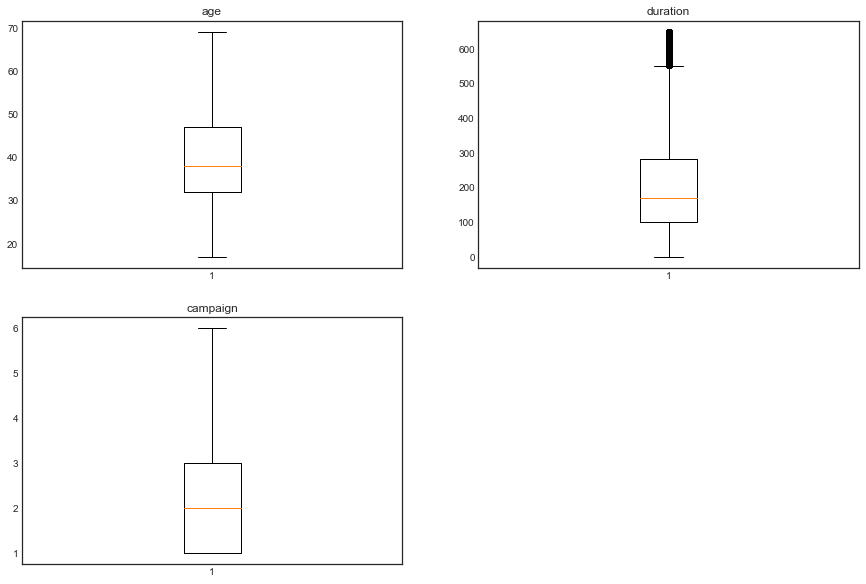

In [41]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(df['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(df['duration'])
ax.set_title('duration')
ax=plt.subplot(223)
plt.boxplot(df['campaign'])
ax.set_title('campaign')

Outliers sudah dihilangkan

In [42]:
#pengelompokkan kategori pendidikan

df_features=df.copy()
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    df_features.loc[df_features['education'] == i, 'education'] = "middle.school"

df_features['education'].value_counts()

middle.school          10688
university.degree      10559
high.school             8287
professional.course     4554
unknown                 1459
illiterate                14
Name: education, dtype: int64

Encoding data kategori

In [43]:
#endcoding fitur bulan dan hari 
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
df_features['month']= df_features['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
df_features['day_of_week']= df_features['day_of_week'].map(day_dict) 

In [44]:
df_features.loc[:, ['month', 'day_of_week']].head()

,month,day_of_week
0,5,2
1,5,2
2,5,2
3,5,2
4,5,2


In [45]:
#endcoding fitur pdays
df_features.loc[df_features['pdays'] == 999, 'pdays'] = 0

In [46]:
df_features['pdays'].value_counts()

0     34305
3       367
6       343
4       105
9        54
2        51
12       50
7        48
10       44
5        38
13       28
1        23
11       22
15       20
14       15
8        14
16       10
17        8
18        6
22        3
21        2
25        1
26        1
27        1
20        1
19        1
Name: pdays, dtype: int64

In [47]:
#endcoding fitur Housing
dictionary={'yes':1,'no':0,'unknown':-1}
df_features['housing']=df_features['housing'].map(dictionary)
df_features['default']=df_features['default'].map(dictionary)
df_features['loan']=df_features['loan'].map(dictionary)

In [48]:
dictionary1={'no':0,'yes':1}
df_features['y']=df_features['y'].map(dictionary1)

In [49]:
df_features.loc[:,['housing','default','loan','y']].head()

,housing,default,loan,y
0,0,0,0,0
1,0,-1,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,1,0


In [50]:
#endcoding fitur contact dan potcome
dummy_contact=pd.get_dummies(df_features['contact'], prefix='dummy',drop_first=True)
dummy_outcome=pd.get_dummies(df_features['poutcome'], prefix='dummy',drop_first=True)
df_features = pd.concat([df_features,dummy_contact,dummy_outcome],axis=1)
df_features.drop(['contact','poutcome'],axis=1, inplace=True)

In [51]:
df_features.loc[:,['dummy_telephone','dummy_nonexistent','dummy_success']].head()

,dummy_telephone,dummy_nonexistent,dummy_success
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [52]:
#endcoding fitur job dan education
bank_job=df_features['job'].value_counts().to_dict()
bank_ed=df_features['education'].value_counts().to_dict()

In [53]:
df_features['job']=df_features['job'].map(bank_job)
df_features['education']=df_features['education'].map(bank_ed)

In [54]:
df_features.loc[:,['job','education']].head()

,job,education
0,899,10688
1,3456,8287
2,3456,8287
3,9110,10688
4,3456,8287


In [55]:
#endcoding fitur marital
df_features.groupby(['marital'])['y'].mean()

marital
divorced    0.063988
married     0.069050
single      0.113226
unknown     0.129032
Name: y, dtype: float64

In [56]:
ordinal_labels=df_features.groupby(['marital'])['y'].mean().sort_values().index
ordinal_labels

Index(['divorced', 'married', 'single', 'unknown'], dtype='object', name='marital')

In [57]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}

In [58]:
df_features['marital_ordinal']=df_features['marital'].map(ordinal_labels2)
df_features.drop(['marital'], axis=1,inplace=True)

In [59]:
df_features.marital_ordinal.value_counts()

1    21506
2    10086
0     3907
3       62
Name: marital_ordinal, dtype: int64

Scaling data

In [60]:
from sklearn.preprocessing import StandardScaler
df_scale=df_features.copy()
Categorical_variables=['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'poutcome', 'marital_ordinal']

feature_scale=[feature for feature in df_scale.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(df_scale[feature_scale])

StandardScaler()

In [61]:
scaled_data = pd.concat([df_scale[['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

,job,education,default,housing,loan,month,day_of_week,y,dummy_telephone,dummy_nonexistent,...,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,dummy_telephone,dummy_nonexistent,dummy_success
0,899,10688,0,0,0,5,2,0,1,1,...,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002,1.322496,0.402835,-0.183056
1,3456,8287,-1,0,0,5,2,0,1,1,...,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002,1.322496,0.402835,-0.183056
2,3456,8287,0,1,0,5,2,0,1,1,...,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002,1.322496,0.402835,-0.183056
3,9110,10688,0,0,0,5,2,0,1,1,...,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002,1.322496,0.402835,-0.183056
4,3456,8287,0,0,1,5,2,0,1,1,...,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002,1.322496,0.402835,-0.183056


In [62]:
from sklearn.ensemble import ExtraTreesClassifier
X=scaled_data.drop(['y'],axis=1)
y=scaled_data.y

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

Menentukan fitur Importance

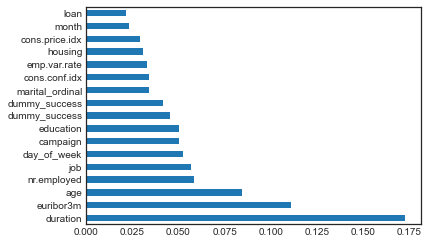

In [63]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

Fitur yang paling berpengaruh ada pada durasi, bunga bank eropa, dan umur

Splitting data

In [64]:
random_state = 11
X=scaled_data.drop(['pdays','month','cons.price.idx','loan','housing','emp.var.rate','y'],axis=1)
y=scaled_data.y

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (28448, 18)
Input Test: (7113, 18)
Output Training: (28448,)
Output Test: (7113,)


Scalling data

In [65]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

Model Logistik Regression

In [66]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6434  104]
 [ 348  227]]
94.0


Model KNeighbors Classifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6465   73]
 [ 404  171]]
93.0


Model Super Vector Clasifier

In [68]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6148  390]
 [ 441  134]]
88.0


Model Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6202  336]
 [ 275  300]]
91.0


Model Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6413  125]
 [ 298  277]]
94.0


Model Gaussian Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[5979  559]
 [ 304  271]]
88.0


Model Gradient Boosting Classifier

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6421  117]
 [ 293  282]]
94.0


Membuat rangkuman analisis model

In [73]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Random Forest Classifier,0.938555
6,Gradient Boosting,0.937887
4,Logistic Model,0.934372
3,K-Near Neighbors,0.932368
1,Decision Tree Classifier,0.913315
2,Support Vector Machine,0.885545
5,Gausian NB,0.872048


Membangun Pipeline

In [74]:
n_jobs = -1
# LogisticRegression
pipe_lr = Pipeline([('lr', LogisticRegression(random_state=random_state, n_jobs=n_jobs, max_iter=500))])
# RandomForestClassifier
pipe_rf = Pipeline([('rf', RandomForestClassifier(random_state=random_state, oob_score=True, n_jobs=n_jobs))])
# KNeighborsClassifier
pipe_knn = Pipeline([('knn', KNeighborsClassifier(n_jobs=n_jobs))])
# DecisionTreeClassifier
pipe_dt = Pipeline([('dt', DecisionTreeClassifier(random_state=random_state, max_features='auto'))])
# BaggingClassifier
pipe_bag = Pipeline([('bag',BaggingClassifier(base_estimator=SGDClassifier(random_state=random_state, n_jobs=n_jobs, max_iter=1500),\
                                              random_state=random_state,oob_score=True,n_jobs=n_jobs))])
# SGDClassifier
pipe_sgd = Pipeline([('sgd', SGDClassifier(random_state=random_state, n_jobs=n_jobs, max_iter=1500))])

In [75]:
#menentukan parameters untuk Grid Search

cv = StratifiedKFold(shuffle=True, n_splits=5, random_state=random_state)
# LogisticRegression
grid_params_lr = [{
                'lr__penalty': ['l2'],
                'lr__C': [0.3, 0.6, 0.7],
                'lr__solver': ['sag']
                }]
# RandomForestClassifier
grid_params_rf = [{
                'rf__criterion': ['entropy'],
                'rf__min_samples_leaf': [80, 100],
                'rf__max_depth': [25, 27],
                'rf__min_samples_split': [3, 5],
                'rf__n_estimators' : [60, 70]
                }]
#KNeighborsClassifier
grid_params_knn = [{'knn__n_neighbors': [16,17,18]}]

# DecisionTreeClassifier
grid_params_dt = [{
                'dt__max_depth': [8, 10],
                'dt__min_samples_leaf': [1, 3, 5, 7]
                  }]
# BaggingClassifier
grid_params_bag = [{'bag__n_estimators': [10, 15, 20]}]

#SGDClassifier
grid_params_sgd = [{
                    'sgd__loss': ['log', 'huber'],
                    'sgd__learning_rate': ['adaptive'],
                    'sgd__eta0': [0.001, 0.01, 0.1],
                    'sgd__penalty': ['l1', 'l2', 'elasticnet'], 
                    'sgd__alpha':[0.1, 1, 5, 10]
                    }]

In [76]:
#Mencari Grid Search
#LogisticRegression
gs_lr = GridSearchCV(pipe_lr, param_grid=grid_params_lr,
                     scoring='accuracy', cv=cv) 
#RandomForestClassifier
gs_rf = GridSearchCV(pipe_rf, param_grid=grid_params_rf,
                     scoring='accuracy', cv=cv)
#KNeighborsClassifier
gs_knn = GridSearchCV(pipe_knn, param_grid=grid_params_knn,
                     scoring='accuracy', cv=cv)
                     
#DecisionTreeClassifier
gs_dt = GridSearchCV(pipe_dt, param_grid=grid_params_dt,
                     scoring='accuracy', cv=cv)
#BaggingClassifier
gs_bag = GridSearchCV(pipe_bag, param_grid=grid_params_bag,
                     scoring='accuracy', cv=cv)
#SGDClassifier
gs_sgd = GridSearchCV(pipe_sgd, param_grid=grid_params_sgd,
                     scoring='accuracy', cv=cv)

In [77]:
# models yang ingin diiterasi
look_for = [gs_lr, gs_rf, gs_knn, gs_dt, gs_bag, gs_sgd]
# dict for later use 
model_dict = {0:'Logistic_reg', 1:'RandomForest', 2:'Knn', 3:'DesionTree', 4:'Bagging with SGDClassifier', 5:'SGD Class'}

In [88]:
#iterasi model dan hasil
result_acc = {}
result_auc = {}
models = []

for index, model in enumerate(look_for):
        start = time.time()
        print()
        print('+++++++ Start Model ++++++++++++++++++++++')
        print('Estimator  {}'.format(model_dict[index]))
        model.fit(X_train, y_train)
        print('---------------------------------------------')
        print('best params {}'.format(model.best_params_))
        print('best score  {}'.format(model.best_score_))
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
        print('---------------------------------------------')
        print('ROC_AUC is {} and accuracy rate is {}'.format(auc, model.score(X_test, y_test)))
        end = time.time()
        print('It lasted for {} sec'.format(round(end - start, 3)))
        print('++++++++ End Model +++++++++++++++++++++++++++')
        print()
        print()
        models.append(model.best_estimator_)
        result_acc[index] = model.best_score_
        result_auc[index] = auc


+++++++ Start Model ++++++++++++++++++++++
Estimator  Logistic_reg
---------------------------------------------
best params {'lr__C': 0.3, 'lr__penalty': 'l2', 'lr__solver': 'sag'}
best score  0.9342660287589808
---------------------------------------------
ROC_AUC is 0.9206349501908574 and accuracy rate is 0.936454379305497
It lasted for 16.278 sec
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start Model ++++++++++++++++++++++
Estimator  RandomForest
---------------------------------------------
best params {'rf__criterion': 'entropy', 'rf__max_depth': 25, 'rf__min_samples_leaf': 80, 'rf__min_samples_split': 3, 'rf__n_estimators': 60}
best score  0.9359532548398366
---------------------------------------------
ROC_AUC is 0.9489052628778911 and accuracy rate is 0.9374384929003233
It lasted for 71.601 sec
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start Model ++++++++++++++++++++++
Estimator  Knn
---------------------------------------------
best params {'k

Pilihan model yang paling efektif

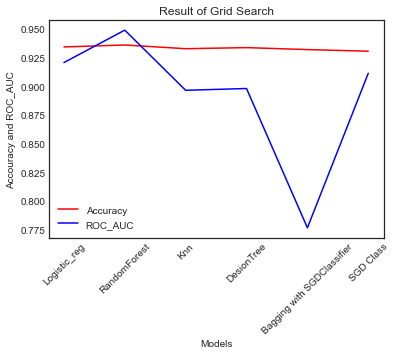

In [107]:
#melihat perbandingan model
plt.plot(model_dict.values(), result_acc.values(), c='r')
plt.plot(model_dict.values(), result_auc.values(), c='b')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.ylabel('Accouracy and ROC_AUC')
plt.title('Result of Grid Search')
plt.legend(['Accuracy', 'ROC_AUC'])
plt.show();

In [90]:
#pengumpulan hasil model
pd.DataFrame(list(zip(model_dict.values(), result_acc.values(), result_auc.values())), \
                  columns=['Model', 'Accuracy_rate','Roc_auc_rate'])

,Model,Accuracy_rate,Roc_auc_rate
0,Logistic_reg,0.934266,0.920635
1,RandomForest,0.935953,0.948905
2,Knn,0.932719,0.896464
3,DesionTree,0.933668,0.898018
4,Bagging with SGDClassifier,0.931946,0.776574
5,SGD Class,0.930540,0.911321


100%|██████████| 39/39 [00:35<00:00,  1.09it/s]


'max oob 0.93662120359955 and number of estimators 105'

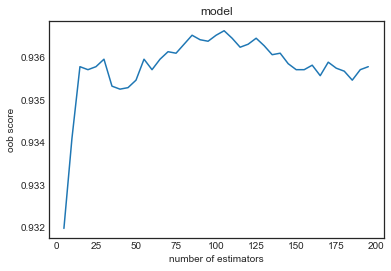

In [91]:
def graph(model, X_train, y_train):
    obb = []
    est = list(range(5, 200, 5))
    for i in tqdm(est):
        random_forest = model(n_estimators=i, criterion='entropy', random_state=11, oob_score=True, n_jobs=-1, \
                           max_depth=25, min_samples_leaf=80, min_samples_split=3,)
        random_forest.fit(X_train, y_train)
        obb.append(random_forest.oob_score_)
    display('max oob {} and number of estimators {}'.format(max(obb), est[np.argmax(obb)]))
    plt.plot(est, obb)
    plt.title('model')
    plt.xlabel('number of estimators')
    plt.ylabel('oob score')
    plt.show();
    
graph(RandomForestClassifier, X_train, y_train)

In [92]:
#grafik ROC_AUC

fpr, tpr, threshold = roc_curve(y_test, models[1].predict_proba(X_test)[:,1])
                                        
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    text=threshold,
    fill='tozeroy',
    name='ROC Curve')

trace1 = go.Scatter(
    x=[0,1],
    y=[0,1],
    line={'color': 'red', 'width': 1, 'dash': 'dash'},
    name='Baseline')

data = [trace0, trace1]

layout = go.Layout(
    title='ROC Curve',
    xaxis={'title': 'False Positive Rate'},
    yaxis={'title': 'True Positive Rate'})

fig = go.Figure(data, layout)
fig.show();

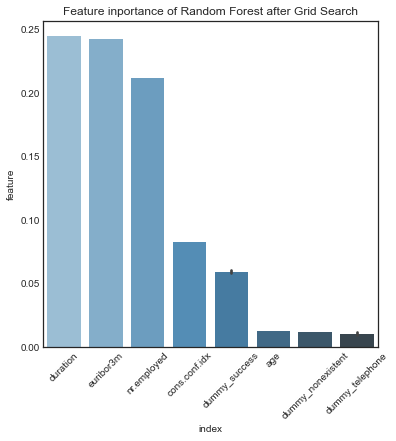

In [93]:
#Melihat fitur importance

X_train = pd.DataFrame(X_train, columns = X.columns)

X_test = pd.DataFrame(X_test, columns=X.columns)

def build_feature_importance(model, X_train, y_train):
    
    models = RandomForestClassifier(criterion='entropy', random_state=11, oob_score=True, n_jobs=-1, \
                           max_depth=25, min_samples_leaf=80, min_samples_split=3, n_estimators=70)
    models.fit(X_train, y_train)
    data = pd.DataFrame(models.feature_importances_, X_train.columns, columns=["feature"])
    data = data.sort_values(by='feature', ascending=False).reset_index()
    plt.figure(figsize=[6,6])
    sns.barplot(x='index', y='feature', data=data[:10], palette="Blues_d")
    plt.title('Feature inportance of Random Forest after Grid Search')
    plt.xticks(rotation=45)
    plt.show();
    
build_feature_importance(RandomForestClassifier, X_train, y_train)

Model inference

In [94]:
#membuat data baru
X_ex= np.random.randint(10, size=(128292,18))

In [95]:
y_pred = logmodel.predict(X_ex)
y_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [96]:
y_predknn = knn.predict(X_ex)
y_predknn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
y_predsvc = svc.predict(X_ex)
y_predsvc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [98]:
y_preddtree = dtree.predict(X_ex)
y_preddtree

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [99]:
y_predrfc = rfc.predict(X_ex)
y_predrfc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
y_predgaussiannb = gaussiannb.predict(X_ex)
y_predgaussiannb

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [101]:
y_predgbk = gbk.predict(X_ex)
y_predgbk

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

Kesimpulan dan Rekomendasi
1. Dalam segmentasi pemasaran, kampanye atau promosi dapat dilakukan dengan pemusatan dengan beberapa segemen seperti staff administrasi dan karyawan paling banyak ditawarkan, sementara untuk perbandingan antara penolakan dan penerimaan tawaran staff administrasi, teknisi, pensiunan dan pelajar patut dipertimbangkan. dengan pemusatan pemasaran akan lebih mengcilkan cost dan lebih efsien.
2. Konsumen yang menolak kebanyakan memiliki durasi yang lebih rendah dibandingkan dengan yang ikut deposit, Semakin lama durasi semakin besar kemungkinan untuk konsumen ikut deposit. Oleh karena itu Bank X harus melakukan pendekatan dengan calon konsumen melalui strategi customer relationship.
3. Promosi kepada berbagai variasi tenaga kerja menunjukkan hubungan yang berbanding lurus, setelah mendapatkan variasi tenaga kerja yang paling berkontribusi selanjutnya Bank X fokus pada konsumen tersebut.
4. indeks harga konsumen juga memberikan pengaruh yang berbanding lurus dengan angka deposit, semakin tinggi indeks harga konsumen atau bunga yang didapatkan oleh konsumen maka konsumen lebih tertarik untuk bergabung. Bank X bisa meningkatkan bunga bagi konsumen hinggal pendabndingan yang optimal antara Bank dan Konsumen.
5. Jumlah tenaga kerja yang di promosikan berhubungan positif dengan angka deposit, artinya semakin banyak orang yang dipromosikan atau di prospek semakin besar kemungkinan untuk mendapatkan konsumen yang ingin berinvestasi pada instrumen Deposit. namun pemasaran juga membutuhkan biaya perlu dilakukan kembali analisis antara biaya pemasaran dan pemasukan yang didapat
6. Kampanye Bank X dilakukan secara maksimal hanya pada bulan May, juni dan juli,kampanye sebaiknya dilakukan secara masif dan konsisten.
7. Hasil model terlihat bahwa feature importan terletak pada durasi, jumlah karyawan dan suku bunga euro, Perlu maksimisasi pada feature tersebut.
8. Model yang paling terbaik yaitu Random Forest Classifier	0.938555 yang bisa mempresiksi model data tersebut


In [ ]:
import pickle
filename = open("scaler.pkl", "wb")
pickle.dump()